In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as sklearn

In [59]:
# Import the data
data_frame = pd.read_csv('/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/MachineLearning/Lab/Lab9/OldFaithfulData.csv')

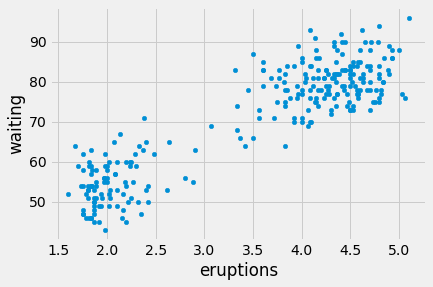

In [69]:
data_frame.plot.scatter(x ='eruptions', y= 'waiting' )

In [78]:
from mlxtend.preprocessing import standardize
X = standardize(data_frame, columns=['eruptions', 'waiting'])
X

,eruptions,waiting
0,0.098499,0.597123
1,-1.481459,-1.245181
2,-0.135861,0.228663
3,-1.057503,-0.655644
4,0.917443,1.039277
...,...,...
267,0.552298,0.744508
268,-1.174245,-1.834719
269,0.815624,1.407737
270,-1.466537,-1.834719


(-2, 2)

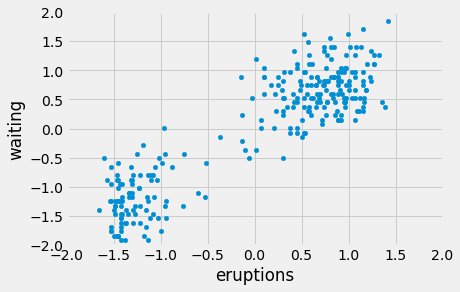

In [80]:
X.plot.scatter(x ='eruptions', y= 'waiting' )
plt.xlim([-2, 2])
plt.ylim([-2, 2])
# ax = plt.subplots(figsize=(8, 8))
# ax.set_aspect('equal')

In [81]:
# import matplotlib.pyplot as plt
# import pandas as pd
# # import seaborn as sns

# # matplotlib inline
# # sns.set_context('notebook')
# plt.style.use('fivethirtyeight')
# from warnings import filterwarnings
# filterwarnings('ignore')

# # Import the data
# data_frame = pd.read_csv('/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/MachineLearning/Lab/Lab9/OldFaithfulData.csv')
# X_std = StandardScaler().fit_transform(data_frame)
# # Plot the data
# plt.figure(figsize=(8, 8))
# plt.scatter(data_frame.iloc[:, 0], data_frame.iloc[:, 1])
# # plt.xlabel('Eruption time (minutes)', fontsize=16)
# # plt.ylabel('Waiting time to next eruption (minutes)', fontsize=16)
# plt.title('Old Faithful Data', fontsize=20, fontweight='bold')
# plt.savefig('plot-data.png')

In [82]:
from copy import deepcopy

In [83]:
from copy import deepcopy

# Number of clusters
K = 2
# Number of training data
n = X.shape[0]
# Number of features in the data
c = X.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
centers = np.random.randn(K,c)*std + mean

centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

clusters = np.zeros(n)
distances = np.zeros((n,K))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(K):
        distances[:,i] = np.linalg.norm(X - centers_new[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(K):
        centers_new[i] = np.mean(X[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new    
# array([[5.006     , 3.418     , 1.464     , 0.244     ],
#        [6.48787879, 2.96212121, 5.34242424, 1.87575758],
#        [5.82352941, 2.69705882, 4.05882353, 1.28823529]])

# Plot the data
colors=['orange', 'blue']
for i in range(n):
    plt.scatter(X[i, 0], X[i,1], s=7, color = colors[int(y[i])])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)

Exception: Data must be 1-dimensional